<a href="https://colab.research.google.com/github/AeroEng16/machine-learning-with-python-logistic-regression-3211129/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

* Medical research
* autonomous cars
* object recognition

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting refers to the region in space where there are too many hyperparameters and training error goes down but test error goes up. Hyperparameterisation results in a second "valley" where generalisation increases.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

trainingData = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
testData = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15699283.18it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 266408.89it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4945574.46it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6267714.66it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

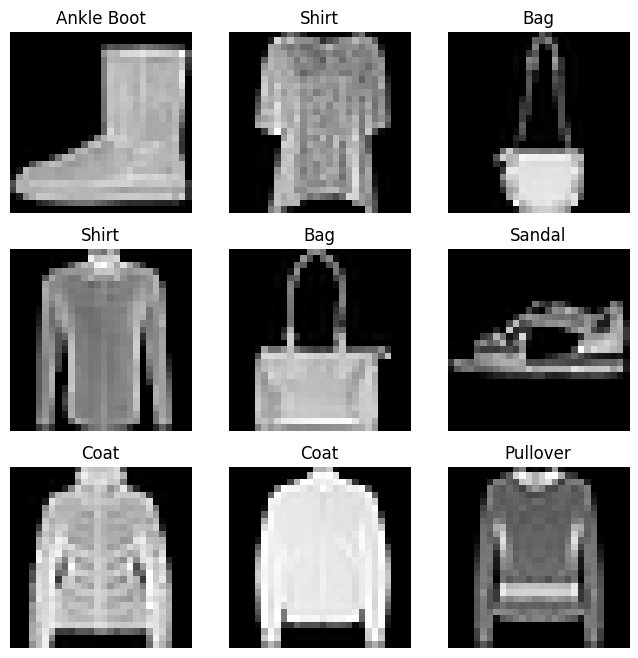

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainingData), size=(1,)).item()
    img, label = trainingData[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [4]:
from torch.utils.data import DataLoader
trainDataLoader = DataLoader(trainingData, batch_size=32,shuffle=True)
testDataLoader = DataLoader(testData, batch_size=32,shuffle=True)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [12]:
from torch import nn
class fashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
    nn.Conv2d(in_channels=input_shape,
                  out_channels = hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),  # kernel size, stride, padding are hyperparameters
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)))
    self.conv_block2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)))
    self.classifier=nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=hidden_units*7*7,     # trick to calculating this
              out_features=output_shape))
  def forward(self,x):
    x = self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  pass
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
      f.write(request.content)

In [10]:
from helper_functions import accuracy_fn
def train_step(model:torch.nn.Module,
              dataLoader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimiser:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device = device):
  """
  Performs training step with model trying to learn on dataloader
  """

  ### Put model into training mode
  model.train()

  ### Training

  train_loss, train_acc = 0, 0

  # Add a loop to loop through the training batches

  for batch, (X,y) in enumerate(dataLoader):
    X,y = X.to(device),y.to(device)
    # 1. Forward pass (outputs raw logits from model)
    y_pred=model(X)
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss +=loss   #accumulate training loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    # 3. Zero grad
    optimiser.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Optimiser step
    optimiser.step()  # Optimizer will update model parameters once per batch rather than once per epoch

  # Divide total train loss by length of train dataloader
  train_loss /=len(dataLoader)
  train_acc /= len(dataLoader)

  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
              dataLoader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  """Function to evaluate performance of trained model"""
  ## Testing

  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in dataLoader:
      X_test,y_test=X_test.to(device),y_test.to(device)
      # 1. Forward pass
      test_pred = model(X_test)

      #2.Calcualte the loss accumulatively
      test_loss+=loss_fn(test_pred,y_test)

      #3 Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(dataLoader)
    # Calculate the test accuracy average per batch
    test_acc /= len(dataLoader)

  # Print out whats happening
  print(f"\nTest loss: {test_loss: .4f}, Test acc: {test_acc: .4f}")


In [14]:
loss_fn = nn.CrossEntropyLoss()
model_2 = fashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(labels_map)).to(device)
optimiser = torch.optim.Adam(model_2.parameters(),
                             lr=0.001)

epochs = 5

for epoch in range(epochs):
  train_step(model_2,trainDataLoader,
             loss_fn=loss_fn,
             optimiser = optimiser,
             accuracy_fn = accuracy_fn,
             device=device)

  test_step(model_2,testDataLoader,loss_fn = loss_fn,
            accuracy_fn=accuracy_fn,device=device)


Train loss: 0.5194 | Train acc: 80.96%

Test loss:  0.3924, Test acc:  86.2819
Train loss: 0.3401 | Train acc: 87.74%

Test loss:  0.3390, Test acc:  87.9093
Train loss: 0.3055 | Train acc: 89.08%

Test loss:  0.3251, Test acc:  88.2688
Train loss: 0.2839 | Train acc: 89.83%

Test loss:  0.3113, Test acc:  88.7081
Train loss: 0.2691 | Train acc: 90.22%

Test loss:  0.2933, Test acc:  89.2971


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [17]:

# Import tqdm for process bar

from tqdm.auto import tqdm

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  """ Returns a dictionary of model predicting on dataloader """
  loss,acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make device agnostics
      X,y=X.to(device),y.to(device)
      # Make predictions
      y_pred=model(X)
      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale the loss and acc to find average per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name":model.__class__.__name__, ## only works when model was created with a class
            "model_loss":loss.item(),
            "model_acc": acc
            }


In [23]:
performance = eval_model(model_2,data_loader = testDataLoader,
                         loss_fn =loss_fn,
                         accuracy_fn = accuracy_fn,
                         device = device)


  0%|          | 0/313 [00:00<?, ?it/s]

In [24]:

def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  """Make predictions using trained model and plot results"""
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:

      #Prepare the sample (add a batch dimension and pass to target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      #Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred prob off gpu for futher calculations
      pred_probs.append(pred_prob.to("cpu"))

  # Stack pred_probs to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(testData),k=9):
  test_samples.append(sample)
  test_labels.append(label)

for

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?